In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('F:\\download\\weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


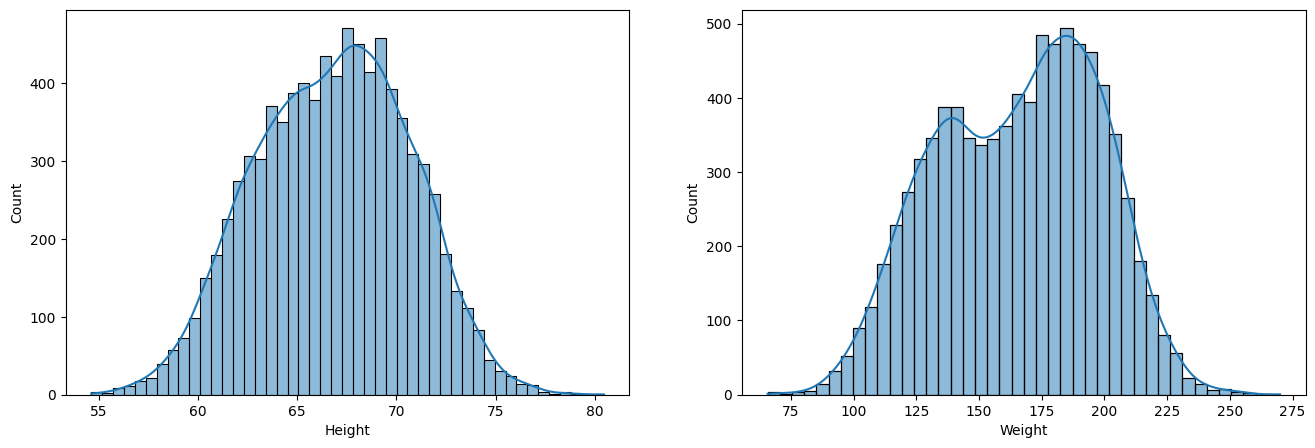

In [3]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(df['Height'],kde = True)

plt.subplot(1,2,2)
sns.histplot(df['Weight'],kde = True)

plt.show()

In [5]:
df['Weight'].skew()

-0.14969479215992904

Weight column is slightly skewed. So we can use iqr based mathod

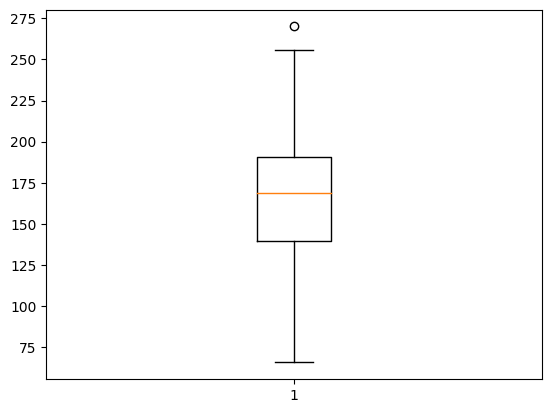

In [15]:
fig, ax = plt.subplots()
ax.boxplot(df['Weight'])
plt.show()

In [16]:
# Finding the IQR
percentile25 = df['Weight'].quantile(0.25)
percentile75 = df['Weight'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 266.85055675
Lower limit 63.692551549999976


Finding Outliers

In [17]:
df[(df['Weight'] > upper_limit) | (df['Weight'] < lower_limit)]

,Gender,Height,Weight
2014,Male,78.998742,269.989698


Trimming

In [18]:
new_df = df[(df['Weight'] < upper_limit) & (df['Weight'] > lower_limit)]

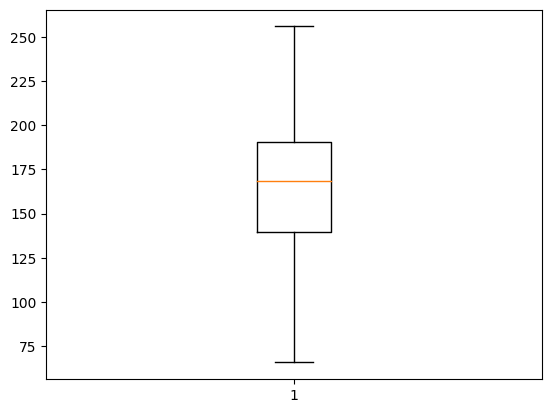

In [19]:
fig, ax = plt.subplots()
ax.boxplot(new_df['Weight'])
plt.show()

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


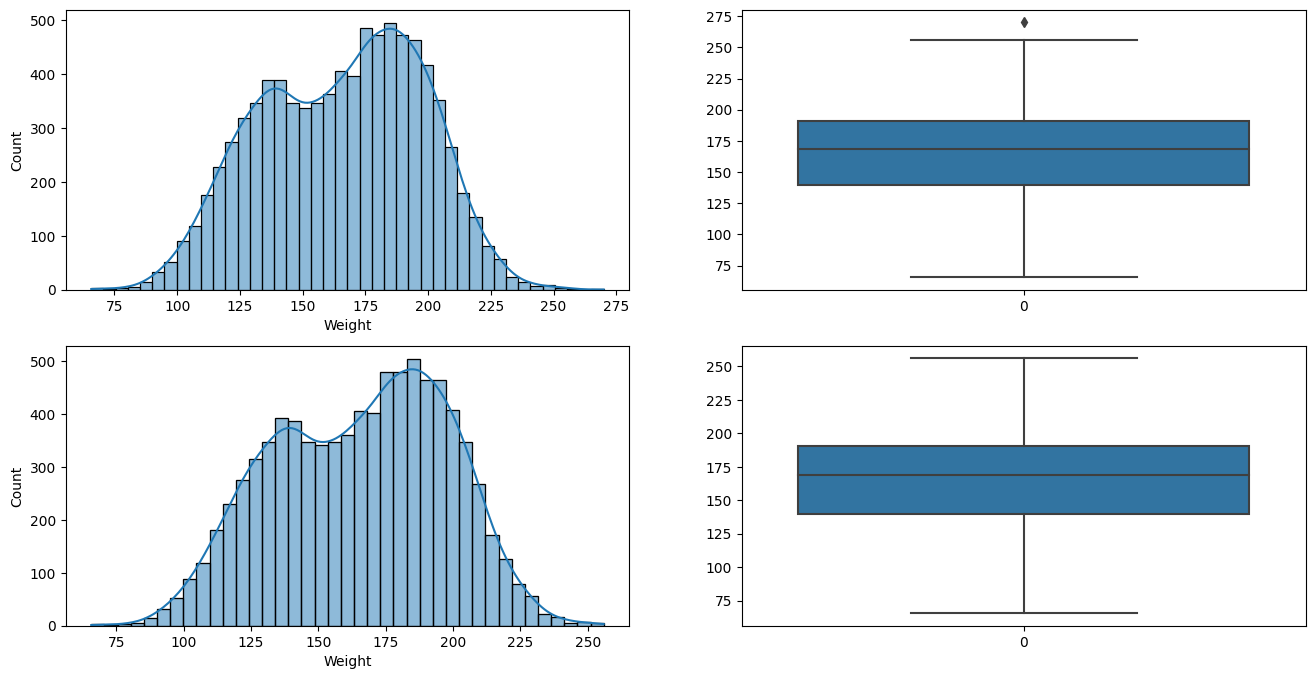

In [23]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.histplot(df['Weight'],kde=True)

plt.subplot(2,2,2)
sns.boxplot(df['Weight'])

plt.subplot(2,2,3)
sns.histplot(new_df['Weight'],kde=True)

plt.subplot(2,2,4)
sns.boxplot(new_df['Weight'])

plt.show()

Capping

In [24]:
new_df_cap = df.copy()

new_df_cap['Weight'] = np.where(
    new_df_cap['Weight'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['Weight'] < lower_limit,
        lower_limit,
        new_df_cap['Weight']
    )
)

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


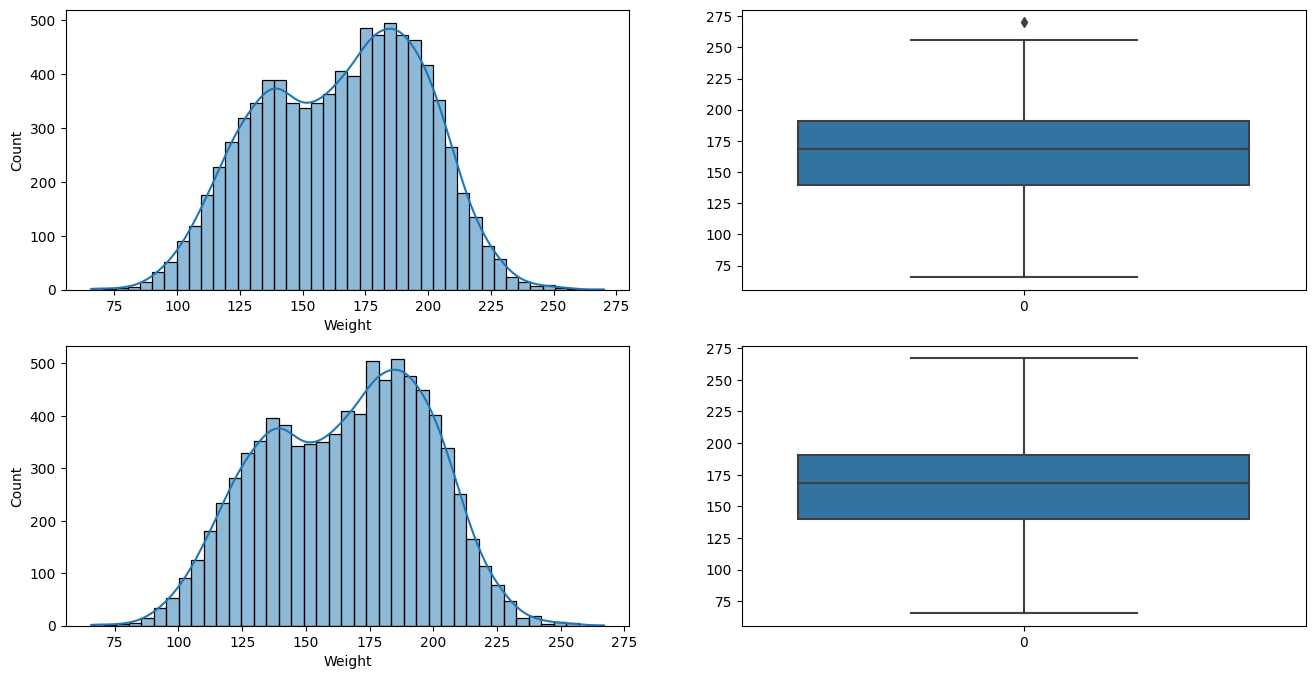

In [26]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.histplot(df['Weight'],kde=True)

plt.subplot(2,2,2)
sns.boxplot(df['Weight'])

plt.subplot(2,2,3)
sns.histplot(new_df_cap['Weight'],kde=True)

plt.subplot(2,2,4)
sns.boxplot(new_df_cap['Weight'])

plt.show()